## Week 10 Lab (K Means)
### COSC 3337 Dr. Rizk


About The Data
We'll be using the Customer Dataset from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains the following attributes:

* CustomerID
* Genre
* Age
* AnnualIncome(k$)
* Spending_Score

Our goal is to group/cluster these customers.

## About K Means
K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps: Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids. Refer back to the lecture video or slides for more detail on K Means.

### Implementation
Because K Means is used more for finding patterns in our data, we'll skip the data exploration portion, but you're welcome to explore this data or your own if working with a different dataset.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Let's first load the data into a pandas DataFrame. We'll use the CustomerID column as our index_col for this DataFrame.

In [3]:
customer_df = pd.read_csv('customers.csv', index_col='CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
customer_df['Genre'] = customer_df['Genre'].astype(str)

# Step 3: Set 'CustomerID' as the index
customer_df.set_index('Genre', inplace=True)

# Make a copy of the DataFrame
customer_df_copy = customer_df.copy()

# Display the first few rows of the DataFrame
print(customer_df_copy.head())

        Age  Annual_Income_(k$)  Spending_Score
Genre                                          
Male     19                  15              39
Male     21                  15              81
Female   20                  16               6
Female   23                  16              77
Female   31                  17              40


calling **.info()** we see that there are no missing values in this dataset since there are 200 entries in total and 200 non-null entries in each column.

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Male to Male
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 200 non-null    int64
 1   Annual_Income_(k$)  200 non-null    int64
 2   Spending_Score      200 non-null    int64
dtypes: int64(3)
memory usage: 6.2+ KB


In [6]:
customer_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, Male to Male
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 200 non-null    int64
 1   Annual_Income_(k$)  200 non-null    int64
 2   Spending_Score      200 non-null    int64
dtypes: int64(3)
memory usage: 6.2+ KB


In [7]:
customer_df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler
# scaling it, so values will be adjsuted st they fall under [0,1]
scaler = MinMaxScaler()

# select only numeric columns for scaling
numeric_columns = customer_df_copy.select_dtypes(include=['number']).columns

# apply the scaler to the numeric columns
customer_df_copy[numeric_columns] = scaler.fit_transform(customer_df_copy[numeric_columns])

# display the summary statistics of the scaled data
print(customer_df_copy.describe())

              Age  Annual_Income_(k$)  Spending_Score
count  200.000000          200.000000      200.000000
mean     0.400962            0.373443        0.502041
std      0.268635            0.215285        0.263505
min      0.000000            0.000000        0.000000
25%      0.206731            0.217213        0.344388
50%      0.346154            0.381148        0.500000
75%      0.596154            0.516393        0.734694
max      1.000000            1.000000        1.000000


To ensure that we don't have any duplicates, we can call **.drop_duplicates(inplace=True)** on our DataFrame.

In [9]:
customer_df.drop_duplicates(inplace=True)

Just so that we can visualize our clusters in the end of this lab, we'll go ahead and only work with 2 variables (spending score and income). However, you're free to use more than 2 variables if you're working with your own dataset.

In [10]:
# saving only Spending_Score and income values into X.

# checking dimensions
print(customer_df.shape)

# check the positions of the columns
print(customer_df.head())

# adjust the indices based on the actual positions
# for example, if 'Spending_Score' is at position 2 and 'Income' is at position 3
X = customer_df.iloc[:, [1,2]].values


print(X[:5])

(200, 3)
        Age  Annual_Income_(k$)  Spending_Score
Genre                                          
Male     19                  15              39
Male     21                  15              81
Female   20                  16               6
Female   23                  16              77
Female   31                  17              40
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


We'll now use the elbow method to find the optimal number of clusters.

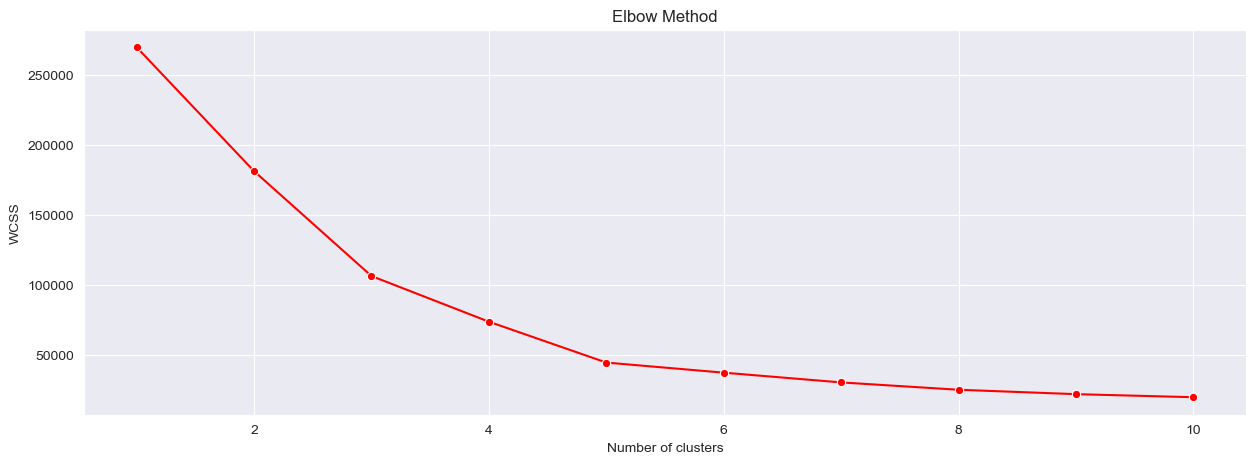

In [11]:
from sklearn.cluster import KMeans

# where we'll store all of the wcss values for plotting later.
wcss = []
for i in range(1, 11):
    # random_state just to ensure we get the same values in the end.
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X)
    # inertia method returns wcss for that model.
    wcss.append(kmeans.inertia_)

# creating lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


The optimal number of clusters is: 3


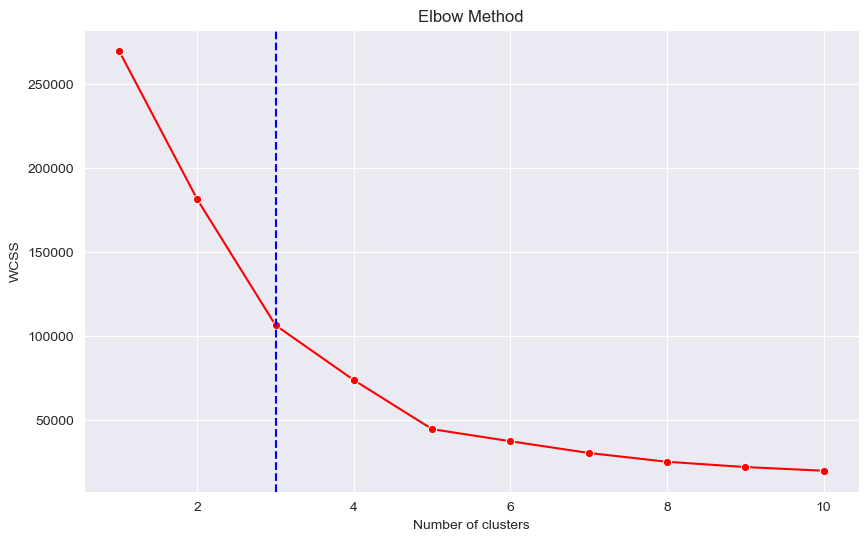

In [12]:
# calculating the differences
first_derivative = np.diff(wcss)
second_derivative = np.diff(first_derivative)

# finding the index of the maximum second derivative
optimal_k = np.argmax(second_derivative) + 2  # +2 because np.diff reduces the original index by 1 twice

print(f'The optimal number of clusters is: {optimal_k}')

# Plotting the elbow point
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.axvline(x=optimal_k, color='blue', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


We're now ready to create our KMeans model and run our predictions on the X vector we created earlier with spending score and income.

In [13]:
from sklearn.cluster import KMeans

# Initialize the KMeans object with n_init explicitly set to 10
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, random_state=42)

# Fit the model and predict the cluster for each data point
y_pred = kmeans.fit_predict(X)

# Display the predicted clusters
# print(y_pred) # clusters are labeled 0-4 (the initialized 5 clusters !)

In [14]:
from sklearn.cluster import KMeans

# Initialize the KMeans object with n_init explicitly set to 10
kmeans2 = KMeans(n_clusters=7, init='k-means++', n_init=10, random_state=42)

# Fit the model and predict the cluster for each data point
y_pred2 = kmeans.fit_predict(X)

# Display the predicted clusters
print(y_pred) # clusters are labeled 0-6 (the initialized 7 clusters !)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 1 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 6 3 6 3 6 3
 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6]


Note: You won't typically be plotting the clusters to visualize since you'll usually have more than 2 variables, but since we only worked with 2 variables, let's go ahead and visualize our clusters.

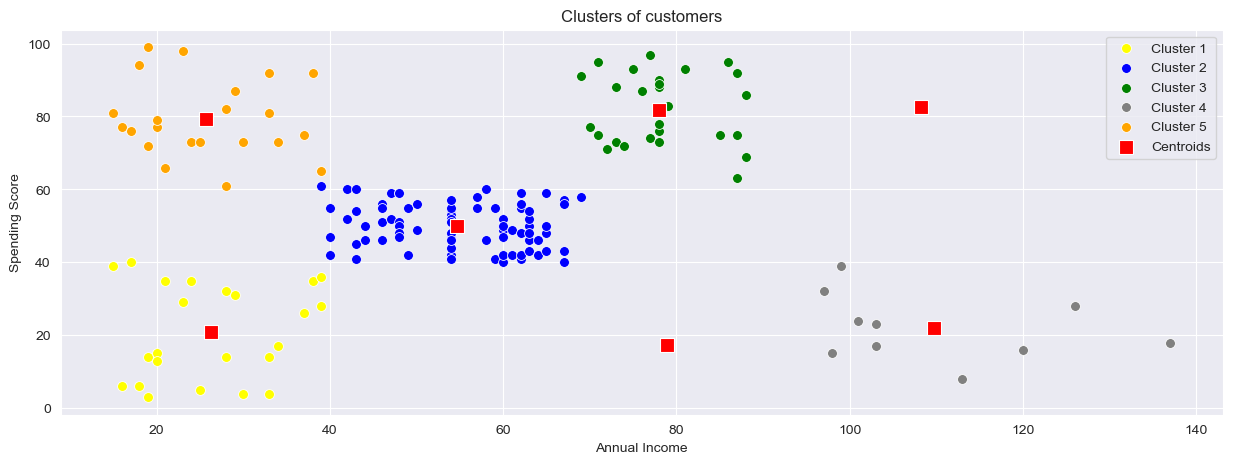

In [15]:
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

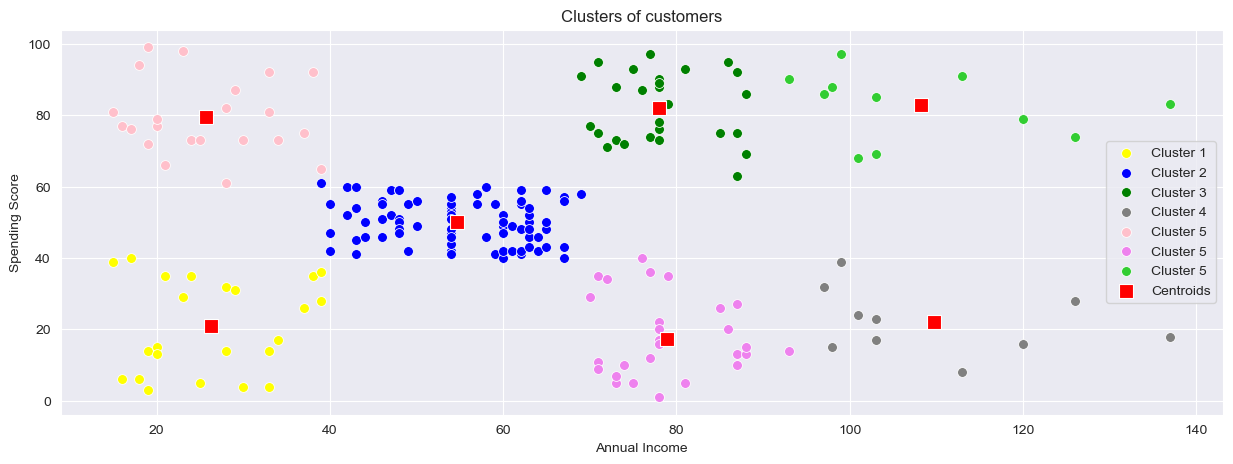

In [16]:
# initializing 7 clusters
sns.scatterplot(x=X[y_pred2 == 0, 0], y=X[y_pred2 == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred2 == 1, 0], y=X[y_pred2 == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred2 == 2, 0], y=X[y_pred2 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred2 == 3, 0], y=X[y_pred2 == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred2 == 4, 0], y=X[y_pred2 == 4, 1], color = 'pink', label = 'Cluster 5',s=50)
sns.scatterplot(x=X[y_pred2 == 5, 0], y=X[y_pred2 == 5, 1], color = 'violet', label = 'Cluster 5',s=50)
sns.scatterplot(x=X[y_pred2 == 6, 0], y=X[y_pred2 == 6, 1], color = 'limegreen', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

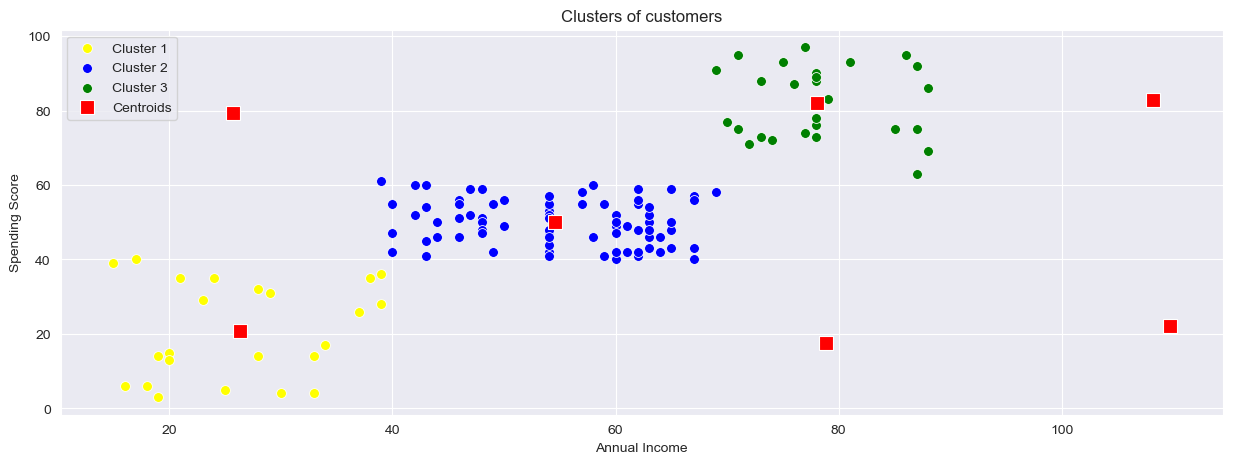

In [19]:
# going about what the elbow method suggested as optimal k clusters
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red',
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Congrats! 🙂 You know know how to use KMeans in sklearn. Try repeating the lab steps on your own data for practice. Since we don't have the ground truth (unsupervised) to compare and evaulate performance, there's not much more we can do here to evaulate our model like we're used to doing. You'll later learn about Silhouette analysis, which will come in handy.